# 교육 플랫폼 사용자 이탈 예측

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# GitHub raw URL로 교체해야 함
url = "https://raw.githubusercontent.com/Heez27/AICE_Associate/main/csv/edu_users.csv"

# CSV 파일 읽기
edu_df = pd.read_csv(url)

# 데이터 확인
edu_df.head()

,rate_math,rate_science,rate_english,rate_humanities,rate_art,tot_time,device,gender,age,resub_yn,comb_yn,othersub_yn,leave_yn
0,0.375,0.797,0.828,0.896,0.394,17.09,mobile,M,30,N,N,Y,1
1,0.951,0.482,0.765,0.909,0.473,28.57,tablet,F,25,N,Y,N,1
2,0.732,0.117,0.574,0.314,0.855,40.97,tablet,F,24,N,N,N,0
3,0.599,0.125,0.956,0.691,0.340,8.09,mobile,M,14,Y,N,N,1
4,0.156,0.686,0.200,0.272,0.870,45.34,tablet,F,15,Y,N,N,0


In [ ]:
edu_df.info()
답02= 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_math        1188 non-null   float64
 1   rate_science     1188 non-null   float64
 2   rate_english     1250 non-null   float64
 3   rate_humanities  1250 non-null   float64
 4   rate_art         1250 non-null   float64
 5   tot_time         1188 non-null   float64
 6   device           1250 non-null   object 
 7   gender           1250 non-null   object 
 8   age              1250 non-null   int64  
 9   resub_yn         1250 non-null   object 
 10  comb_yn          1250 non-null   object 
 11  othersub_yn      1250 non-null   object 
 12  leave_yn         1250 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 127.1+ KB


# 문제4. heatmap 시각화

In [ ]:
corr_list=['rate_math', 'rate_science', 'rate_english', 'rate_humanities', 'rate_art']

In [ ]:
# 중간과정
edu_df[corr_list].corr()

,rate_math,rate_science,rate_english,rate_humanities,rate_art
rate_math,1.000000,-0.049638,0.006031,0.001535,-0.037954
rate_science,-0.049638,1.000000,0.021276,0.056940,-0.019499
rate_english,0.006031,0.021276,1.000000,0.025619,-0.014633
rate_humanities,0.001535,0.056940,0.025619,1.000000,-0.003499
rate_art,-0.037954,-0.019499,-0.014633,-0.003499,1.000000


<Axes: >

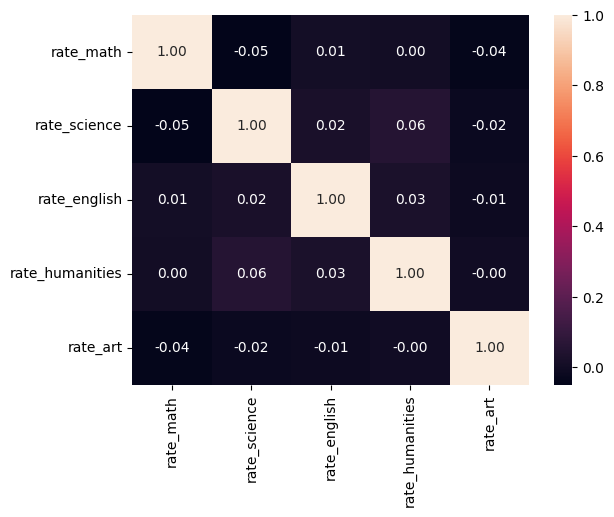

In [ ]:




sns.heatmap(edu_df[corr_list].corr(), annot=True, fmt=".2f")

# 문제5. 이탈 여부에 따라 learning_time의 분포를 시각화하고, 두 그룹의 차이를 비교하려고 한다.

leave_yn별로 tot_time의 boxplot을 그리기.

In [ ]:
edu_df.groupby('leave_yn')['tot_time'].mean()

,tot_time
leave_yn,
0,30.100378
1,28.832180


<Axes: xlabel='leave_yn', ylabel='tot_time'>

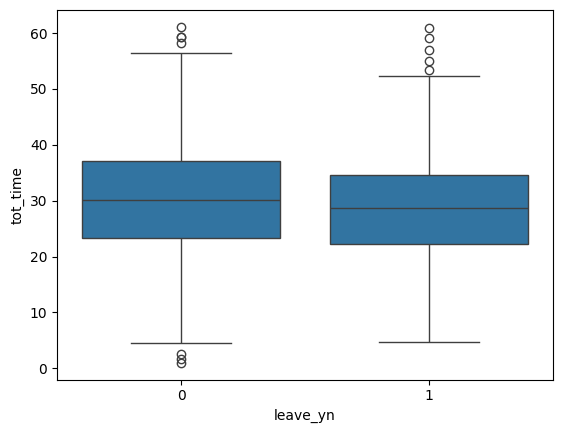

In [ ]:
sns.boxplot(data=edu_df, x="leave_yn", y="tot_time")

# 문제6. 사용자의 이탈 여부에 따라 주요 과목들의 평균 시청률이 어떻게 달라지는지 분석하려고 한다.

leave_yn 별로 rate_math, rate_science의 평균을 pivot_table()을 이용해 만들기.

In [ ]:

edu_df.pivot_table(index='leave_yn', values=['rate_math', 'rate_science'],aggfunc='mean')

,rate_math,rate_science
leave_yn,,
0,0.487965,0.496375
1,0.515511,0.505424


# 문제7. 결측치 처리

rate_math 컬럼의 결측치를 mean으로 채우기

rate_science 컬럼의 결측치를 median으로 채우기

tot_time컬럼의 결측치를 mode로 채우기

In [ ]:
edu_df['rate_math'].fillna(edu_df['rate_math'].mean(), inplace=True)
edu_df['rate_science'].fillna(edu_df['rate_science'].median(),inplace=True)
edu_df['tot_time'].fillna(edu_df['tot_time'].mode(),inplace=True)

/tmp/ipython-input-741152404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  edu_df['rate_math'].fillna(edu_df['rate_math'].mean(), inplace=True)
/tmp/ipython-input-741152404.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

# 문제8. Feature(X)와 Target(y)을 이용해 학습과 평가를 위해 분리

In [ ]:
X = edu_df[['rate_math', 'rate_science', 'rate_english', 'tot_time']]
y = edu_df['leave_yn']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 문제9. StandardScaler 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# 중간단계
X_train.head()

,rate_math,rate_science,rate_english,tot_time
1194,0.046,0.440,0.345,22.38
911,0.268,0.621,0.130,24.09
422,0.091,0.868,0.817,36.14
670,0.173,0.696,0.655,31.13
931,0.835,0.213,0.991,23.69


In [ ]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.54960442, -0.18401656, -0.52610719, -0.7373477 ],
       [-0.77329659,  0.455126  , -1.26796342, -0.56638986],
       [-1.39224473,  1.32732606,  1.10252603,  0.63831305],
       ...,
       [ 0.81778477,  1.16489204,  0.87134292,  2.66581304],
       [ 1.00311953, -1.23983768,  1.03006565, -1.72210484],
       [-1.40623226, -0.65719392, -1.71307716,  0.36538036]])

In [ ]:
X_valid = scaler.fit_transform(X_valid)

# 문제10. 랜덤포레스트 분류 모델 문제10. 랜덤포레스트 분류 모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=5, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=150,
                       random_state=42)

# 문제11. XGBoost 분류 모델 사용

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

rfc_predict = rfc.predict(X_valid)
xgbc_predict = xgbc.predict(X_valid)

print('rfc accuracy_score, f1_score')
print(accuracy_score(y_valid, rfc_predict))
print(f1_score(y_valid, rfc_predict))

print('xgbc accuracy_score, f1_score')
print(accuracy_score(y_valid, xgbc_predict))
print(f1_score(y_valid, xgbc_predict))

rfc accuracy_score, f1_score
0.64
0.0425531914893617
xgbc accuracy_score, f1_score
0.592
0.203125


# 문제 13. 딥러닝 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(64, activation="selu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation="selu"))
model.add(BatchNormalization())
model.add(Dense(16,activation='selu' ))
model.add(Dense(1,activation='sigmoid' ))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=32,epochs=45,validation_data=(X_valid, y_valid))

Epoch 1/45


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6989 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 2/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6970 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 3/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6909 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 4/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6952 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 5/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6898 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 6/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7001 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 7/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7134 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 8/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6811 - loss: nan - val_accuracy: 0.6640 - val_loss: nan
Epoch 9/45
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

# 문제 14. 학습된 딥러닝 모델을 활용하여 새로운 입력 데이터를 예측하기

In [ ]:
simul_data = np.array([[0.3, 150, 0.7, 120]])

In [ ]:
deep_pre = model.predict(simul_data)
답14 = np.where(deep_pre >0.5, 1, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
